<h1 style='background-color: gold; padding-top:60px; padding-bottom:60px; text-align:center; color:black; font-size: 3rem; font-weight: 100;'>
    Is it too late for me to start learning programming? <br>
    <p style='font-size: 2rem; text-align: center;'>
    A little visualization based on SO survey 2019
    </style>
</style>

what do you want to show?
+ show question that are intresintg to solve this problem
+ show how many of respondendts started later than their 20s
+ show salary/proffesion of ppl who started late
* show how quickly it they moved to similar salaries compared to ppl who started earlier
* ppl who started late and have the biggest exp - what languages do they choose - we may assume it's good for beginners to start with them to quickly find a job

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Load the survey results and schema 

In [2]:
df = pd.read_csv('data/survey_results_public.csv')
df_full = pd.read_csv('data/survey_results_public.csv')
schema_df = pd.read_csv('data/survey_results_schema.csv')

In [3]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', df.shape[1]+1)
pd.set_option('display.max_rows', schema_df.shape[0]+1)
schema_df.set_index('Column', inplace=True)

Choose survey questions that could help here

In [5]:
questions = ['Age', 'Country', 'MainBranch', 'Employment', 'Student', 'EdLevel', 'UndergradMajor', 'JobSat', 'CareerSat',
             'YearsCode', 'Age1stCode', 'YearsCodePro', 'ConvertedComp', 'LanguageWorkedWith']
df = df.loc[:, questions]

In [6]:
schema_df.loc[questions]

,QuestionText
Column,
Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
Country,In which country do you currently reside?
MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
Employment,Which of the following best describes your current employment status?
Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
UndergradMajor,What was your main or most important field of study?
JobSat,"How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)"
CareerSat,"Overall, how satisfied are you with your career thus far?"


In [7]:
# check columns types
df.applymap(type)

,Age,Country,MainBranch,Employment,Student,EdLevel,UndergradMajor,JobSat,CareerSat,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,LanguageWorkedWith
0,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'str'>
1,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'str'>
2,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>
3,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>
4,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,<class 'float'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>
88879,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>
88880,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>
88881,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>


In [8]:
#convert to int
def convert_text(value):
    if value == 'Less than 1 year':
        return int(1)
    elif value == 'Younger than 5 years':
        return int(4)
    elif value == 'More than 50 years':
        return int(51)
    elif value == 'Older than 85':
        return  int(86)
    else:
        return value

df.loc[:,'Age1stCode'] = df.loc[:,'Age1stCode'].apply(convert_text)
df.loc[:,'YearsCode'] = df.loc[:,'YearsCode'].apply(convert_text)
df.loc[:,'YearsCodePro'] = df.loc[:,'YearsCodePro'].apply(convert_text)

In [9]:
df.loc[:,'Age1stCode']  = pd.to_numeric(df['Age1stCode'], errors='coerce')
df.loc[:,'YearsCode']  = pd.to_numeric(df['YearsCode'], errors='coerce')
df.loc[:,'YearsCodePro']  = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [12]:
# update yearsCode value if yearsCodePro is bigger
df.loc[df['YearsCode'] < df['YearsCodePro'], 'YearsCode'] = df.loc[df['YearsCode'] < df['YearsCodePro'],'YearsCodePro']

Series([], Name: YearsCode, dtype: float64)

In [18]:
# get only the rows where Age1stCode is provided or it can be deducted from age and years code that someone started older than their 20s
late_start_filter = (df['Age1stCode'].notnull()) | ((df['YearsCode']<df['Age']-20))
df = df[late_start_filter]

In [19]:
# get basic info about produced df
df.describe()

,Age,YearsCode,Age1stCode,YearsCodePro,ConvertedComp
count,78973.000000,87550.000000,87634.000000,74130.000000,5.571700e+04
mean,30.339102,11.765368,15.409396,8.204897,1.269803e+05
std,9.171274,9.153770,5.199099,7.596538,2.838616e+05
min,1.000000,1.000000,4.000000,1.000000,0.000000e+00
25%,24.000000,5.000000,12.000000,3.000000,2.576400e+04
50%,29.000000,9.000000,15.000000,6.000000,5.728700e+04
75%,35.000000,16.000000,18.000000,11.000000,1.000000e+05
max,99.000000,51.000000,86.000000,51.000000,2.000000e+06


In [20]:
df_org = df

In [77]:
df=df_org

In [78]:
def make_conditions(column, is_general=False):
    if is_general is False:
        return [(df[column] < 7), (df[column] < 13), (df[column] < 19), (df[column] < 25), (df[column] < 36),
        (df[column] < 51), (df[column] < 66), (df[column] >= 66)]
    return [(df[column]<20), (df[column]>=20)]


groups = ['preschool', 'elementary school', 'high school', 'higher edu', 'young proffesional', 'experienced proffesional',
          'knowledgeable adult', 'curious senior']
groups_general = ['adolescent', 'adult']

df['AgeGroup'] = pd.Series(np.select(make_conditions('Age'), groups, default='other'))
df['Age1stCodeGroup'] = np.select(make_conditions('Age1stCode'), groups, default='other')
df['Age1stGeneralGroup'] = np.select(make_conditions('Age1stCode', True), groups_general, default='other')


# def make_groups(value, is_general=False):
#     if is_general is False:
#         if value < 7:
#             return groups[0]
#         elif value < 13:
#             return groups[1]
#         elif value < 19:
#             return groups[2]
#         elif value < 25:
#             return groups[3]
#         elif value < 36:
#             return groups[4]
#         elif value < 51:
#             return groups[5]
#         elif value < 66:
#             return groups[6]
#         elif value >= 66:
#             return groups[7]
#     else:
#         if value < 20:
#             return groups_general[0]
#         elif value >= 20:
#             return groups_general[1]

# df['AgeGroup'] = df['Age'].apply(make_groups)
# df['Age1stCodeGroup'] = df['Age1stCode'].apply(make_groups)
# df['Age1stGeneralGroup'] = df['Age1stCode'].apply(make_groups(is_general=True))

In [14]:
age_group = df.groupby(['AgeGroup'])
age1st_group = df.groupby(['Age1stCodeGroup'])
age1st_group_general = df.groupby(['Age1stGeneralGroup'])

In [15]:
age1st_df = pd.DataFrame(df.loc[:, 'Age1stCodeGroup'].value_counts())
age1st_df.rename(columns={'':'AgeGroup', 'Age1stCodeGroup': 'Age1stCodersCount'}, inplace=True)
age1st_general_df = pd.DataFrame(df.loc[:, 'Age1stGeneralGroup'].value_counts())

In [75]:
df['Age1stCodeGroup'].value_counts()

high school                 46003
elementary school           22103
higher edu                  13825
young proffesional          3415 
preschool                   1869 
experienced proffesional    346  
curious senior              37   
knowledgeable adult         36   
Name: Age1stCodeGroup, dtype: int64

In [17]:
# how many of respondendts started later than 20
# ok, 15% is not a lot but let's examine them further, it's 13k people

In [139]:
fig = go.Figure(
    data=[go.Pie(
        values=df.loc[:, 'Age1stCodeGroup'].value_counts(),
        labels=df.loc[:, 'Age1stCodeGroup'].value_counts().index.tolist(),
    )],
    layout=go.Layout(
        title=go.layout.Title(text='All respondendts 1st code age', x=0.5),
    )
)

fig.update_traces(marker=dict(colors=px.colors.sequential.dense))

fig.show()

# remove the data pointers

Let's further analyze only late starters data

In [98]:
df_ls = df[df['Age1stGeneralGroup']=='adult']

In [99]:
df_rest = df.drop(df_ls.index.tolist())

In [111]:
df_ls['Age1stCodeGroup'].value_counts()

higher edu                  9264
young proffesional          3415
experienced proffesional    346 
curious senior              37  
knowledgeable adult         36  
Name: Age1stCodeGroup, dtype: int64

In [134]:
# for adults, how does it ?group?

fig = px.bar(df_ls['Age1stCodeGroup'].value_counts(),
             x=df_ls['Age1stCodeGroup'].value_counts().index.tolist(),
             y=df_ls['Age1stCodeGroup'].value_counts(),
             color='Age1stCodeGroup',
             color_continuous_scale='dense',
             title='Late starters 1st code age',
             labels={'x':'Age group', 'y':'No responsdendts'}, height=500
            )

fig.show()

# move title to center

In [24]:
# get ppl who started at uni but only code late, 
# remove rest who started at uni
highedu_filter = df_ls['Age1stCodeGroup']=='higher edu'
yearscode_filter = (df_ls['YearsCode'] < df_ls['Age'] - df_ls['Age1stCode'])
df_ls = df_ls[(highedu_filter & yearscode_filter) | ~highedu_filter]




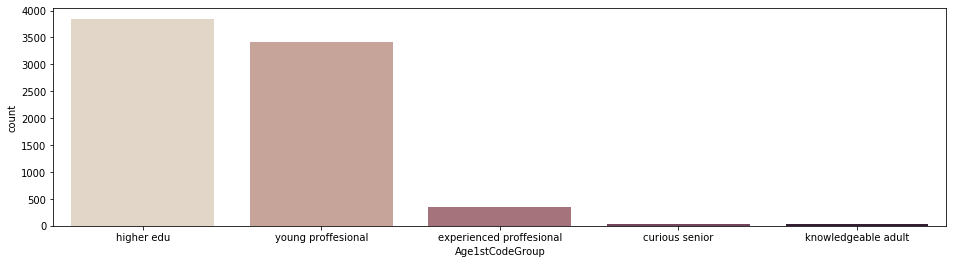

In [25]:
plt.figure(figsize=(16,4))
sns.countplot(x='Age1stCodeGroup', palette="ch:.25", data=df_ls)


In [26]:
compensations = pd.DataFrame(
    {'Late starters compensations median': [df_ls['ConvertedComp'].median()], 
     'All compensations median': [df['ConvertedComp'].median()]})

In [27]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=compensations.columns,
                             y=compensations.iloc[0], 
                             marker={'color': compensations.iloc[0], 'colorscale': 'Viridis'}
                            )],
    layout_title_text="Comparison of compensations converted to USD",
    
)
fig.update_layout(
    yaxis_title="USD",
    template = 'plotly_white',
 )

fig.show()

In [28]:
# fig=px.bar(x=compensations.columns,y=compensations.iloc[0],
#            title="Comparison of compensations converted to USD", 
#            )
# fig.update_layout(
#     yaxis_title= "USD",
#     xaxis_title= "Compensation",
#     template = 'plotly_white',
#  )

           
# fig.show()

In [29]:
# fig = px.pie(values=df_adults['MainBranch'].value_counts(normalize=True),
#              labels=df_adults['MainBranch'].value_counts().index.tolist(),
#              names=df_adults['MainBranch'].value_counts().index.tolist(),
#              title='Main occupation of late starters',
# #              showlegend=False

#             )
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.update_layout(
#     title={
#         'text': "Main occupation of late starters",
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'})

# fig.show()

In [ ]:
# show salary/proffesion of ppl who started late

In [30]:
fig = go.Figure(data=[
    go.Pie(
        values=df_ls['MainBranch'].value_counts(normalize=True),
        labels=df_ls['MainBranch'].value_counts().index.tolist(),
#         marker={'color': df_adults['MainBranch'].value_counts(), 'colorscale': 'Viridis'},
        textinfo='label+percent',
        showlegend=False,
    )])


fig.update_layout(
    title={
        'text': "Main occupation of late starters",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
)

fig.show()

In [31]:
# job satisfaction - late starters vs. rest

In [32]:
df_rest['JobSat'].value_counts(normalize=True)

Slightly satisfied                    0.343516
Very satisfied                        0.318855
Slightly dissatisfied                 0.150240
Neither satisfied nor dissatisfied    0.120558
Very dissatisfied                     0.066831
Name: JobSat, dtype: float64

In [33]:
df_ls['JobSat'].value_counts(normalize=True)

Slightly satisfied                    0.318205
Very satisfied                        0.316860
Slightly dissatisfied                 0.159859
Neither satisfied nor dissatisfied    0.132627
Very dissatisfied                     0.072449
Name: JobSat, dtype: float64

In [34]:
fig = go.Figure(data=[
    go.Bar(name='The rest', x=df_rest['JobSat'].value_counts(normalize=True).index.tolist(), y=df_rest['JobSat'].value_counts(normalize=True)),
    go.Bar(name='Late starters', x=df_ls['JobSat'].value_counts(normalize=True).index.tolist(), y=df_ls['JobSat'].value_counts(normalize=True))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [35]:
# career satisfaction

In [96]:
rest_jobsat_df = pd.DataFrame({'Satisfied': [df_rest['JobSat'].value_counts(normalize=True)['Very satisfied'] + df_rest['JobSat'].value_counts(normalize=True)['Slightly satisfied']],
             'Neither satisfied nor dissatisfied': [df_rest['JobSat'].value_counts(normalize=True)['Neither satisfied nor dissatisfied']],
              'Not satisfied': [df_rest['JobSat'].value_counts(normalize=True)['Very dissatisfied'] + df_rest['JobSat'].value_counts(normalize=True)['Slightly dissatisfied']],
             })
rest_carsat_df = pd.DataFrame({'Satisfied': [df_rest['CareerSat'].value_counts(normalize=True)['Very satisfied'] + df_rest['CareerSat'].value_counts(normalize=True)['Slightly satisfied']],
             'Neither satisfied nor dissatisfied': [df_rest['CareerSat'].value_counts(normalize=True)['Neither satisfied nor dissatisfied']],
              'Not satisfied': [df_rest['CareerSat'].value_counts(normalize=True)['Very dissatisfied'] + df_rest['CareerSat'].value_counts(normalize=True)['Slightly dissatisfied']],
             })

ls_jobsat_df = pd.DataFrame({'Satisfied': [df_ls['JobSat'].value_counts(normalize=True)['Very satisfied'] + df_ls['JobSat'].value_counts(normalize=True)['Slightly satisfied']],
             'Neither satisfied nor dissatisfied': [df_ls['JobSat'].value_counts(normalize=True)['Neither satisfied nor dissatisfied']],
              'Not satisfied': [df_ls['JobSat'].value_counts(normalize=True)['Very dissatisfied'] + df_ls['JobSat'].value_counts(normalize=True)['Slightly dissatisfied']],
             })
ls_carsat_df = pd.DataFrame({'Satisfied': [df_ls['CareerSat'].value_counts(normalize=True)['Very satisfied'] + df_ls['CareerSat'].value_counts(normalize=True)['Slightly satisfied']],
             'Neither satisfied nor dissatisfied': [df_ls['CareerSat'].value_counts(normalize=True)['Neither satisfied nor dissatisfied']],
              'Not satisfied': [df_ls['CareerSat'].value_counts(normalize=True)['Very dissatisfied'] + df_ls['CareerSat'].value_counts(normalize=True)['Slightly dissatisfied']],
             })

NameError: name 'df_rest' is not defined

In [37]:
df_ls['CareerSat'].value_counts(normalize=True)

Very satisfied                        0.412729
Slightly satisfied                    0.314661
Slightly dissatisfied                 0.109271
Neither satisfied nor dissatisfied    0.107485
Very dissatisfied                     0.055853
Name: CareerSat, dtype: float64

In [38]:
fig = go.Figure(data=[
    go.Bar(name='The rest', x=df_rest['CareerSat'].value_counts(normalize=True).index.tolist(), y=df_rest['CareerSat'].value_counts(normalize=True)),
    go.Bar(name='Late starters', x=df_ls['CareerSat'].value_counts(normalize=True).index.tolist(), y=df_ls['CareerSat'].value_counts(normalize=True))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [39]:
df_ls['JobSat'].value_counts()

Slightly satisfied                    1893
Very satisfied                        1885
Slightly dissatisfied                 951 
Neither satisfied nor dissatisfied    789 
Very dissatisfied                     431 
Name: JobSat, dtype: int64

In [40]:
sum([1893,1885])

3778